# Kolmogorov-Smirnov Test
Vinicius Trevisan 2021

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Kolmogorov-Smirnov Test

### Create some samples

In [2]:
# Create random samples
norm_a = np.random.normal(loc = 0, scale = 1, size = 500)
norm_b = np.random.normal(loc = 0.1, scale = 1, size = 500)
norm_c = np.random.normal(loc = 3, scale = 1, size = 500)
f_a = np.random.f(dfnum = 5, dfden  = 10, size = 500)

In [3]:
norm_a.sort()
norm_b.sort()
norm_c.sort()
f_a.sort()

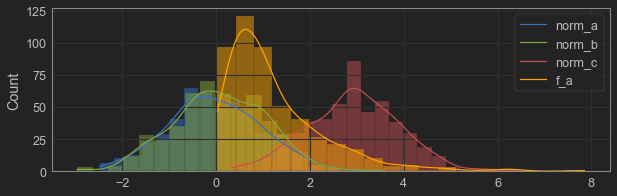

In [56]:
# Visualize them
plt.figure(figsize = (10,3))
sns.histplot(norm_a, bins = 20, kde = True, color = 'b')
sns.histplot(norm_b, bins = 20, kde = True, color = 'g')
sns.histplot(norm_c, bins = 20, kde = True, color = 'r')
sns.histplot(f_a, bins = 20, kde = True, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

In [5]:
def cdf(sample, x, sort = False):
    '''
    Return the value of the Cumulative Distribution Function, evaluated for a given sample and a value x.
    
    Args:
        sample: The list or array of observations.
        x: The value for which the numerical cdf is evaluated.
    
    Returns:
        cdf = CDF_{sample}(x)
    '''
    
    # Sorts the sample, if needed
    if sort:
        sample.sort()
    
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    
    return cdf

In [6]:
# Creates their CDFs for visualization
cdf_norm_a = np.array([cdf(norm_a, x, sort = True) for x in norm_a])
cdf_norm_b = np.array([cdf(norm_b, x, sort = True) for x in norm_b])
cdf_norm_c = np.array([cdf(norm_c, x, sort = True) for x in norm_c])
cdf_f_a = np.array([cdf(f_a, x, sort = True) for x in f_a])

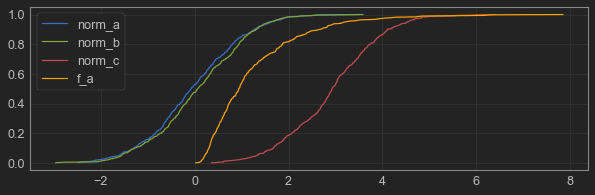

In [57]:
# Visualize them
plt.figure(figsize = (10,3))
sns.lineplot(x = norm_a, y = cdf_norm_a, color = 'b')
sns.lineplot(x = norm_b, y = cdf_norm_b, color = 'g')
sns.lineplot(x = norm_c, y = cdf_norm_c, color = 'r')
sns.lineplot(x = f_a, y = cdf_f_a, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

## Illustrating the KS Statistic

In [8]:
norm_d = np.random.normal(loc = 0, scale = 2, size = 500)
norm_d.sort()
cdf_norm_d = np.array([cdf(norm_d, x, sort = True) for x in norm_d])

Text(0.5, 1.0, 'Kolmogorov-Smirnov Test')

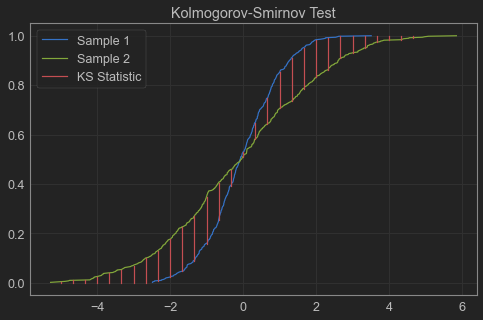

In [9]:
plt.figure(figsize = (8,5))
sns.lineplot(x = norm_a, y = cdf_norm_a, color = 'b')
sns.lineplot(x = norm_d, y = cdf_norm_d, color = 'g')
min_x = int(min(min(norm_a), min(norm_d)))
max_x = int(max(max(norm_a), max(norm_d)))
for i in range(min_x * 3, max_x * 3):
    j = i/3
    plt.plot([j, j], [cdf(norm_a, j), cdf(norm_d, j)], color = 'r')
plt.legend(["Sample 1", "Sample 2", "KS Statistic"])
plt.title("Kolmogorov-Smirnov Test")

### Plotting the KS distribution

In [47]:
# Calculate samples
n = 10
x = np.random.uniform(0, 1, 1000)
y = stats.kstwo.pdf(x, n = n)

Text(0.5, 1.0, 'Kolmogorov-Smirnov Distribution for en=10')

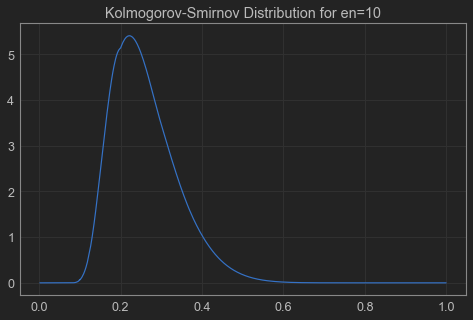

In [49]:
plt.figure(figsize = (8,5))
sns.lineplot(x = x, y = y)
plt.title(f"Kolmogorov-Smirnov Distribution for en={n}")

## Evaluates the KS test for normality

The test being executed is the two-tailed test.

The Null Hypothesis is that both distributions are identical

The Alternative Hypothesis is that both distributions are not identical

If p-value < 0.05 (for 5% significance) we reject the Null Hypothesis, and therefore the distributions are NOT identical

Using the baseline as the normal distribution and standardizing the data, the KS test will be a normality test and the null hypothesis will be "the distribution is normal"

In [10]:
def standardize(sample):
    
    # Standardize the data
    mean = sample.mean()
    std = sample.std()
    sample_z = (sample - mean)/std
    
    return sample_z    

In [11]:
def ks_norm(sample):
    
    # Sorts the sample
    sample.sort()
    
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in sample:
        cdf_normal = stats.norm.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [12]:
# Calculates the KS statistic
# We wish to test for normality, so we want to compare to a normal distribution with mean = 0 and variance = 1.
# We need then to standardize the data. If we don't do that, a normal distribution with other mean or variance will fail the test.
ks_norm_a = ks_norm(standardize(norm_a))
ks_norm_b = ks_norm(standardize(norm_b))
ks_norm_c = ks_norm(standardize(norm_c))
ks_f_a = ks_norm(standardize(f_a))

In [13]:
# Prints the result
print(f"norm_a: ks = {ks_norm_a['ks_stat']:.4f} (p-value = {ks_norm_a['p_value']:.3e}, is normal = {ks_norm_a['p_value'] > 0.05})")
print(f"norm_b: ks = {ks_norm_b['ks_stat']:.4f} (p-value = {ks_norm_b['p_value']:.3e}, is normal = {ks_norm_b['p_value'] > 0.05})")
print(f"norm_c: ks = {ks_norm_c['ks_stat']:.4f} (p-value = {ks_norm_c['p_value']:.3e}, is normal = {ks_norm_c['p_value'] > 0.05})")
print(f"F_a: ks = {ks_f_a['ks_stat']:.4f} (p-value = {ks_f_a['p_value']:.3e}, is normal = {ks_f_a['p_value'] > 0.05})")

norm_a: ks = 0.0252 (p-value = 9.003e-01, is normal = True)
norm_b: ks = 0.0324 (p-value = 6.574e-01, is normal = True)
norm_c: ks = 0.0333 (p-value = 6.225e-01, is normal = True)
F_a: ks = 0.1538 (p-value = 8.548e-11, is normal = False)


### Using scipy.stats.ks_1samp for testing the normality
Compares our method with the built-in KS test of the scipy.stats library

In [14]:
# Evaluates the KS test
ks_norm_a = stats.ks_1samp(x = standardize(norm_a), cdf = stats.norm.cdf)
ks_norm_b = stats.ks_1samp(x = standardize(norm_b), cdf = stats.norm.cdf)
ks_norm_c = stats.ks_1samp(x = standardize(norm_c), cdf = stats.norm.cdf)
ks_f_a = stats.ks_1samp(x = standardize(f_a), cdf = stats.norm.cdf)

In [15]:
# Prints the results
print(f"norm_a: ks = {ks_norm_a.statistic:.4f} (p-value = {ks_norm_a.pvalue:.3e}, is normal = {ks_norm_a.pvalue > 0.05})")
print(f"norm_b: ks = {ks_norm_b.statistic:.4f} (p-value = {ks_norm_b.pvalue:.3e}, is normal = {ks_norm_b.pvalue > 0.05})")
print(f"norm_c: ks = {ks_norm_c.statistic:.4f} (p-value = {ks_norm_c.pvalue:.3e}, is normal = {ks_norm_c.pvalue > 0.05})")
print(f"f_a: ks = {ks_f_a.statistic:.4f} (p-value = {ks_f_a.pvalue:.3e}, is normal = {ks_f_a.pvalue > 0.05})")

norm_a: ks = 0.0252 (p-value = 9.003e-01, is normal = True)
norm_b: ks = 0.0344 (p-value = 5.822e-01, is normal = True)
norm_c: ks = 0.0353 (p-value = 5.482e-01, is normal = True)
f_a: ks = 0.1538 (p-value = 8.548e-11, is normal = False)


## Evaluates the KS between two samples

The test being executed is the two-tailed test.

The Null Hypothesis is that both distributions are identical

The Alternative Hypothesis is that both distributions are not identical

If p-value < 0.05 (for 5% significance) we reject the Null Hypothesis, and therefore the distributions are NOT identical

Using the baseline as the normal distribution and standardizing the data, the KS test will be a normality test and the null hypothesis will be "the distribution is normal"

In [53]:
def ks_2samp(sample1, sample2):
    
    # Gets all observations
    observations = np.concatenate((sample1, sample2))
    observations.sort()
    
    # Sorts the samples
    sample1.sort()
    sample2.sort()
    
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in observations:
        cdf_sample1 = cdf(sample = sample1, x  = x)
        cdf_sample2 = cdf(sample = sample2, x  = x)
        D_ks.append(abs(cdf_sample1 - cdf_sample2))
    ks_stat = max(D_ks)
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(len(sample1)), float(len(sample2))
    en = m * n / (m + n)
    p_value = stats.kstwo.sf(ks_stat, np.round(en))
    
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [54]:
# Evaluates all possible combinations.
# We want to know if the distributions are identical, so we cannot standardize them
sets = [norm_a, norm_b, norm_c, f_a]
names = ['norm_a', 'norm_b', 'norm_c', 'f_a']
ks_scores = {}
for _ in range(len(names)):
    name1 = names.pop(0)
    sample1 = sets.pop(0)
    for name2, sample2 in zip(names, sets):
        key1 = name1 + "_" +  name2
        key2 = name2 + "_" +  name1
        ks = ks_2samp(sample1, sample2)
        ks_scores[key1] = ks
        ks_scores[key2] = ks

In [55]:
# Prints the results
print(f"norm_a vs norm_b: ks = {ks_scores['norm_a_norm_b']['ks_stat']:.4f} (p-value = {ks_scores['norm_a_norm_b']['p_value']:.3e}, are equal = {ks_scores['norm_a_norm_b']['p_value'] > 0.05})")
print(f"norm_a vs norm_c: ks = {ks_scores['norm_a_norm_c']['ks_stat']:.4f} (p-value = {ks_scores['norm_a_norm_c']['p_value']:.3e}, are equal = {ks_scores['norm_a_norm_c']['p_value'] > 0.05})")
print(f"norm_a vs f_a: ks = {ks_scores['norm_a_f_a']['ks_stat']:.4f} (p-value = {ks_scores['norm_a_f_a']['p_value']:.3e}, are equal = {ks_scores['norm_a_f_a']['p_value'] > 0.05})")
print(f"norm_b vs norm_c: ks = {ks_scores['norm_b_norm_c']['ks_stat']:.4f} (p-value = {ks_scores['norm_b_norm_c']['p_value']:.3e}, are equal = {ks_scores['norm_b_norm_c']['p_value'] > 0.05})")
print(f"norm_b vs f_a: ks = {ks_scores['norm_b_f_a']['ks_stat']:.4f} (p-value = {ks_scores['norm_b_f_a']['p_value']:.3e}, are equal = {ks_scores['norm_b_f_a']['p_value'] > 0.05})")
print(f"norm_c vs f_a: ks = {ks_scores['norm_c_f_a']['ks_stat']:.4f} (p-value = {ks_scores['norm_c_f_a']['p_value']:.3e}, are equal = {ks_scores['norm_c_f_a']['p_value'] > 0.05})")

norm_a vs norm_b: ks = 0.0680 (p-value = 1.891e-01, are equal = True)
norm_a vs norm_c: ks = 0.8640 (p-value = 1.169e-216, are equal = False)
norm_a vs f_a: ks = 0.5720 (p-value = 6.293e-78, are equal = False)
norm_b vs norm_c: ks = 0.8680 (p-value = 5.772e-220, are equal = False)
norm_b vs f_a: ks = 0.5160 (p-value = 2.293e-62, are equal = False)
norm_c vs f_a: ks = 0.6580 (p-value = 1.128e-106, are equal = False)


### Using scipy.stats.ks_2samp to compare the distributions
Compares our method with the built-in KS test of the scipy.stats library

In [19]:
# Evaluates all possible combinations.
sets = [norm_a, norm_b, norm_c, f_a]
names = ['norm_a', 'norm_b', 'norm_c', 'f_a']
ks_scores = {}
for _ in range(len(names)):
    name1 = names.pop(0)
    sample1 = sets.pop(0)
    for name2, sample2 in zip(names, sets):
        key1 = name1 + "_" +  name2
        key2 = name2 + "_" +  name1
        ks = stats.ks_2samp(sample1, sample2)
        ks_scores[key1] = ks
        ks_scores[key2] = ks

In [20]:
# Prints the results
print(f"norm_a vs norm_b: ks = {ks_scores['norm_a_norm_b'].statistic:.4f} (p-value = {ks_scores['norm_a_norm_b'].pvalue:.3e}, are equal = {ks_scores['norm_a_norm_b'].pvalue > 0.05})")
print(f"norm_a vs norm_c: ks = {ks_scores['norm_a_norm_c'].statistic:.4f} (p-value = {ks_scores['norm_a_norm_c'].pvalue:.3e}, are equal = {ks_scores['norm_a_norm_c'].pvalue > 0.05})")
print(f"norm_a vs f_a: ks = {ks_scores['norm_a_f_a'].statistic:.4f} (p-value = {ks_scores['norm_a_f_a'].pvalue:.3e}, are equal = {ks_scores['norm_a_f_a'].pvalue > 0.05})")
print(f"norm_b vs norm_c: ks = {ks_scores['norm_b_norm_c'].statistic:.4f} (p-value = {ks_scores['norm_b_norm_c'].pvalue:.3e}, are equal = {ks_scores['norm_b_norm_c'].pvalue > 0.05})")
print(f"norm_b vs f_a: ks = {ks_scores['norm_b_f_a'].statistic:.4f} (p-value = {ks_scores['norm_b_f_a'].pvalue:.3e}, are equal = {ks_scores['norm_b_f_a'].pvalue > 0.05})")
print(f"norm_c vs f_a: ks = {ks_scores['norm_c_f_a'].statistic:.4f} (p-value = {ks_scores['norm_c_f_a'].pvalue:.3e}, are equal = {ks_scores['norm_c_f_a'].pvalue > 0.05})")

norm_a vs norm_b: ks = 0.0680 (p-value = 1.980e-01, are equal = True)
norm_a vs norm_c: ks = 0.8640 (p-value = 2.900e-193, are equal = False)
norm_a vs f_a: ks = 0.5720 (p-value = 7.020e-76, are equal = False)
norm_b vs norm_c: ks = 0.8680 (p-value = 1.516e-195, are equal = False)
norm_b vs f_a: ks = 0.5160 (p-value = 4.631e-61, are equal = False)
norm_c vs f_a: ks = 0.6580 (p-value = 1.175e-102, are equal = False)
